### Convolutional Neural Network on Dataset - 4

In [1]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! head dataset_4_preprocessed.csv

﻿id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,70,1.015,0,0,1,0,1,1,124,24,1.2,142,4.2,12.4,37,6400,4.7,1,0,1,0,1,1,0
1,44,70,1.025,0,0,1,0,1,1,96,87.5,4,135,4.5,13.8,48,7800,4.4,1,1,1,0,1,1,1
2,34,70,1.025,0,0,1,0,1,1,87,38,0.5,144,4.8,17.1,47,7400,6.1,1,1,1,0,1,1,1
3,45,70,1.025,2,0,1,1,0,1,117,52,2.2,136,3.8,10,30,19100,3.7,1,1,1,0,1,1,0
4,42,80,1.02,0,0,1,0,1,1,132,24,0.7,140,4.1,14.4,50,5000,4.5,1,1,1,0,1,1,1
5,34,80,1.025,0,0,1,0,1,1,121,27,1.2,144,3.9,13.6,52,9200,6.3,1,1,1,0,1,1,1
6,59,100,1.015,1.5,0,1,1,1,1,109.5,96,6.4,131.5,4.1,6.6,35,7850,4.2,0,0,1,0,1,0,0
7,35,80,1.02,0,0,1,0,1,1,104,31,1.2,135,5,16.1,45,4300,5.2,1,1,1,0,1,1,1
8,72,90,1.01,1.5,3,1,1,1,1,308,36,2.5,131,4.3,11.65,40,9700,4.7,0,0,1,1,1,1,0


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/content/dataset_4_preprocessed.csv')
df = df.drop(columns=['id'])
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70,1.015,0.0,0.0,1,0,1,1,124.0,...,37.0,6400,4.70,1,0,1,0,1,1,0
1,44.0,70,1.025,0.0,0.0,1,0,1,1,96.0,...,48.0,7800,4.40,1,1,1,0,1,1,1
2,34.0,70,1.025,0.0,0.0,1,0,1,1,87.0,...,47.0,7400,6.10,1,1,1,0,1,1,1
3,45.0,70,1.025,2.0,0.0,1,1,0,1,117.0,...,30.0,19100,3.70,1,1,1,0,1,1,0
4,42.0,80,1.020,0.0,0.0,1,0,1,1,132.0,...,50.0,5000,4.50,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,69.0,80,1.020,3.0,0.0,0,0,1,1,220.5,...,35.5,9600,4.00,0,1,1,0,1,1,0
396,67.0,90,1.020,1.0,0.0,1,1,0,1,141.0,...,41.0,10000,4.50,0,1,1,0,1,1,0
397,47.0,60,1.020,0.0,0.0,1,0,1,1,117.0,...,45.0,5200,5.60,1,1,1,0,1,1,1
398,47.0,80,1.025,0.0,0.0,1,0,1,1,124.0,...,41.0,7000,5.70,1,1,1,0,1,1,1


In [5]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70,1.015,0.0,0.0,1,0,1,1,124.0,...,37.0,6400,4.7,1,0,1,0,1,1,0
1,44.0,70,1.025,0.0,0.0,1,0,1,1,96.0,...,48.0,7800,4.4,1,1,1,0,1,1,1
2,34.0,70,1.025,0.0,0.0,1,0,1,1,87.0,...,47.0,7400,6.1,1,1,1,0,1,1,1
3,45.0,70,1.025,2.0,0.0,1,1,0,1,117.0,...,30.0,19100,3.7,1,1,1,0,1,1,0
4,42.0,80,1.020,0.0,0.0,1,0,1,1,132.0,...,50.0,5000,4.5,1,1,1,0,1,1,1


In [6]:
df.shape

(400, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    int64  
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    int64  
 6   pc              400 non-null    int64  
 7   pcc             400 non-null    int64  
 8   ba              400 non-null    int64  
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    float64
 16  wc              400 non-null    int64  
 17  rc              400 non-null    flo

In [8]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,50.915000,76.300000,1.017177,1.03250,0.472500,0.882500,0.352500,0.895000,0.945000,149.903750,...,39.057500,8541.250000,4.702625,0.632500,0.655000,0.915000,0.207500,0.810000,0.850000,0.375000
std,17.441568,13.662051,0.005511,1.29688,1.062811,0.322418,0.478347,0.306937,0.228266,78.723272,...,8.406448,2681.171879,0.920505,0.482728,0.475964,0.279231,0.406024,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.875000,70.000000,1.012500,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,100.000000,...,33.000000,6750.000000,4.100000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,54.000000,80.000000,1.017500,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,122.000000,...,41.000000,8400.000000,4.725000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,1.000000,1.000000,169.000000,...,45.000000,10000.000000,5.262500,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [10]:
X=df.drop(columns='classification',axis=1)
Y=df['classification']
# scaler=StandardScaler()
# scaler=MinMaxScaler(feature_range=(0,1))   
scaler = RobustScaler()  
scaled_X=scaler.fit_transform(X)
scaled_X=pd.DataFrame(scaled_X, columns=X.columns)
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size=0.2,random_state =42)


In [11]:
"""
scaler = MinMaxScaler(feature_range=(0,1))   
# scaler = RobustScaler()  
scaled_X = scaler.fit_transform(X)
X = scaled_X
print(X[:10])

# Splitting into train and test data - 80% train, 20% test
split_pct = int(0.8*len(X))
train_X, test_X = X[:split_pct], X[split_pct:]
train_Y, test_Y = Y[:split_pct], Y[split_pct:]
print("\n\n")
print(train_X[:10])
"""

'\nscaler = MinMaxScaler(feature_range=(0,1))   \n# scaler = RobustScaler()  \nscaled_X = scaler.fit_transform(X)\nX = scaled_X\nprint(X[:10])\n\n# Splitting into train and test data - 80% train, 20% test\nsplit_pct = int(0.8*len(X))\ntrain_X, test_X = X[:split_pct], X[split_pct:]\ntrain_Y, test_Y = Y[:split_pct], Y[split_pct:]\nprint("\n\n")\nprint(train_X[:10])\n'

# Sequential Model in Keras

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model=Sequential()
model.add(Dense(8,input_dim=len(X_train.columns),activation='relu'))
model.add(Dense(4,activation='relu')) # y = max(0, x)
#model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  # y = 1 / 1+e^ -z

In [14]:
"""model=Sequential()
model.add(Dense(8,input_dim=len(train_X[0,:]),activation='relu'))
model.add(Dense(4,activation='relu')) # y = max(0, x)
#model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  # y = 1 / 1+e^ -z
"""

"model=Sequential()\nmodel.add(Dense(8,input_dim=len(train_X[0,:]),activation='relu'))\nmodel.add(Dense(4,activation='relu')) # y = max(0, x)\n#model.add(Dense(4,activation='relu'))\nmodel.add(Dense(1,activation='sigmoid'))  # y = 1 / 1+e^ -z\n"

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


Adaptive Moment Estimation is an algorithm for optimization technique for gradient descent. Efficient when working with large problem involving a lot of data or parameters. <br>
Intuitively, it is a combination of the ‘gradient descent with momentum’ algorithm and the ‘RMSP’ algorithm.<br>
rmsprop -> Root Mean Squared Propagation<br>
The binary_crossentropy function computes the cross-entropy loss between true labels and predicted labels<br>

In [16]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
# model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])


In [17]:
model.fit(x=X_train,y=Y_train,epochs=256,verbose=1)

Epoch 1/256
10/10 [==============================] - 1s 2ms/step - loss: 0.8816 - accuracy: 0.2969
Epoch 2/256
10/10 [==============================] - 0s 3ms/step - loss: 0.8075 - accuracy: 0.3719
Epoch 3/256
10/10 [==============================] - 0s 2ms/step - loss: 0.7563 - accuracy: 0.4500
Epoch 4/256
10/10 [==============================] - 0s 3ms/step - loss: 0.7139 - accuracy: 0.5312
Epoch 5/256
10/10 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.6125
Epoch 6/256
10/10 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6625
Epoch 7/256
10/10 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.6781
Epoch 8/256
10/10 [==============================] - 0s 2ms/step - loss: 0.5915 - accuracy: 0.6938
Epoch 9/256
10/10 [==============================] - 0s 3ms/step - loss: 0.5668 - accuracy: 0.7031
Epoch 10/256
10/10 [==============================] - 0s 2ms/step - loss: 0.5423 - accuracy: 0.7156
Epoch 11/

In [18]:
# prediction = model.predict(test_X)
# print(prediction[:5])

predicts = model.predict(X_test)
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(Y_test,predicts.round()))
print('Recall: %.3f' % recall_score(Y_test, predicts.round()))
print('Accuracy: %.3f' % accuracy_score(Y_test, predicts.round()))
print('F1-Score: %.3f' % f1_score(Y_test, predicts.round()))


Precision: 1.000
Recall: 1.000
Accuracy: 1.000
F1-Score: 1.000


In [19]:
# print(test_Y[:5])

NameError: ignored

In [21]:
# accuracy = accuracy_score(test_Y,prediction.round()) 
# print(accuracy)

In [22]:
# Less than 0.5, No. More than 0.5, Yes.
#predicts = predicts.round()

In [20]:
def print_result(data):
  df = pd.DataFrame((np.array(data)).reshape(1,-1), columns=X_train.columns)
  standard_data=scaler.transform(df)
  df = pd.DataFrame(standard_data, columns=X_train.columns)
  predict=model.predict(df)
  if predict==0:
    print("You are healthy")
  else:
    print("You are suffering from Chronic Kidney Disease")

In [23]:
data=[65,75,1.010,3,0,0,1,0,1,122,42,1.7,136,4.7,12.6,45,7900,2.8,0,0,1,0,1,1]
print_result(data)
data=[75,75,1.025,3,0,1,1,0,1,128,43,280,128,4,12.6,50,10000,2.8,1,0,1,0,1,1]
print_result(data)

You are suffering from Chronic Kidney Disease
You are healthy


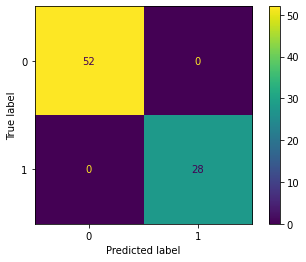

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test, predicts.round())